In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
TRAINING_DIR = "/content/drive/MyDrive/Kaggle/processed_data/train"
VALIDATION_DIR = "/content/drive/MyDrive/Kaggle/processed_data/val"
TEST_DIR = "/content/drive/MyDrive/Kaggle/processed_data/test"

In [ ]:
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(
      rescale = 1./255
)
train_generator = training_datagen.flow_from_directory(	TRAINING_DIR,
	                                              target_size=(150, 150),
                                                 batch_size=126,
                                                 class_mode='categorical')
    
valid_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
	                                              target_size=(150, 150),
                                                 batch_size=126,
                                                 class_mode='categorical')

test_datagen = ImageDataGenerator(
      rescale = 1./255
)
test_generator = test_datagen.flow_from_directory(
	TEST_DIR,
	target_size=(150, 150),
	class_mode='categorical',
  batch_size=1
)


Found 2593 images belonging to 6 classes.
Found 860 images belonging to 6 classes.
Found 870 images belonging to 6 classes.


In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])


model.summary()

from tensorflow.keras.optimizers import Adam
adam_opt = Adam(lr=0.001)

model.compile(loss = 'categorical_crossentropy', optimizer = adam_opt, metrics=['accuracy'])

history = model.fit(train_generator, epochs=50, steps_per_epoch=20, validation_data = valid_generator, verbose = 1, validation_steps=3)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

870/870 - 226s - loss: 0.6418 - accuracy: 0.7839

test accuracy :  0.7839080691337585


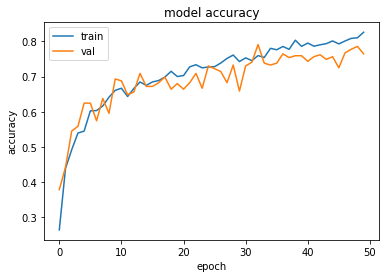

In [ ]:
model.save("flowers_v4.h5")
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\ntest accuracy : ', test_acc)
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

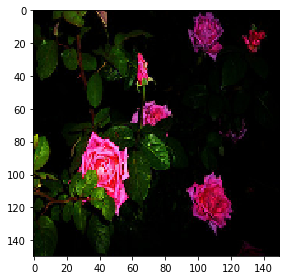

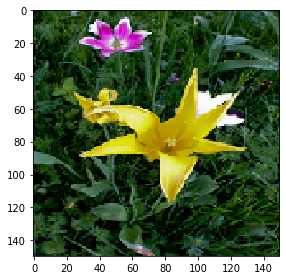

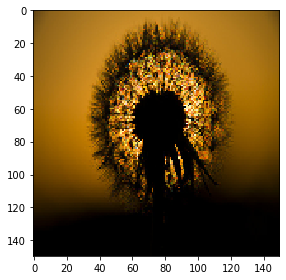

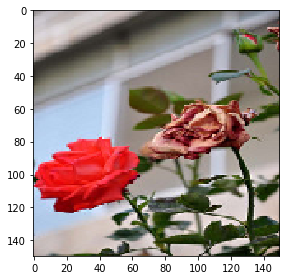

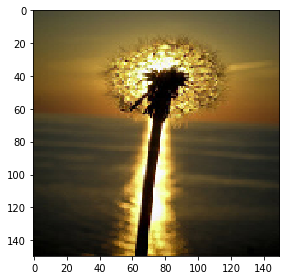

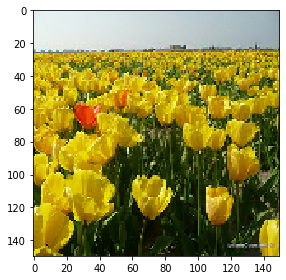

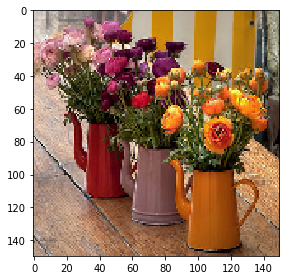

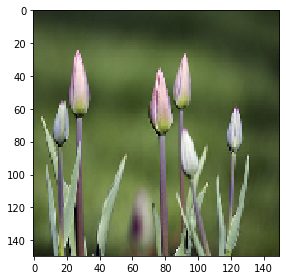

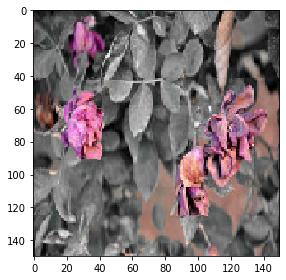

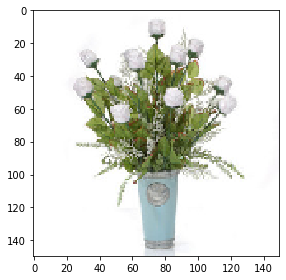

In [ ]:
from skimage import io
import numpy as np
probabilities = np.zeros((10, 6))

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()
for j in range (10):
  x,y = test_generator.next()
  probabilities[j] = (model.predict(x))
  image = x[0]
  imshow(image)

In [ ]:
import pandas as pd
 
map_indices = test_generator.class_indices
df = pd.DataFrame(np.around(probabilities, 4))
df.columns = [label for (label,v) in map_indices.items()]
df

,daisy,dandelion,flowers,rose,sunflower,tulip
0,0.0010,0.0001,0.0,0.8443,0.0000,0.1546
1,0.0075,0.0174,0.0,0.0998,0.1325,0.7428
2,0.0000,0.0077,0.0,0.0000,0.9922,0.0000
3,0.0127,0.0012,0.0,0.2873,0.0003,0.6985
4,0.0008,0.0233,0.0,0.1582,0.0014,0.8163
5,0.0002,0.0064,0.0,0.0132,0.6564,0.3238
6,0.0004,0.0017,0.0,0.3591,0.0073,0.6315
7,0.0141,0.0138,0.0,0.1906,0.0040,0.7775
8,0.0245,0.0099,0.0,0.7953,0.0014,0.1690
9,0.2504,0.1755,0.0,0.0606,0.3744,0.1391
